In [1]:
import pandas as pd

In [4]:
data = pd.read_excel("C:\\Users\\SSP\\Desktop\\Dr_Baradaran\\spf.data.4.401.V1.xlsx")

In [5]:
data.head()

,seg,Y,X1,X2,X3
0,59,49,4.344300,8076.666667,0.920747
1,58,44,9.025771,8076.666667,0.997145
2,57,35,9.401453,8076.666667,0.744566
3,56,1,0.685524,8076.666667,0.000000
4,55,5,1.494137,8076.666667,0.669283


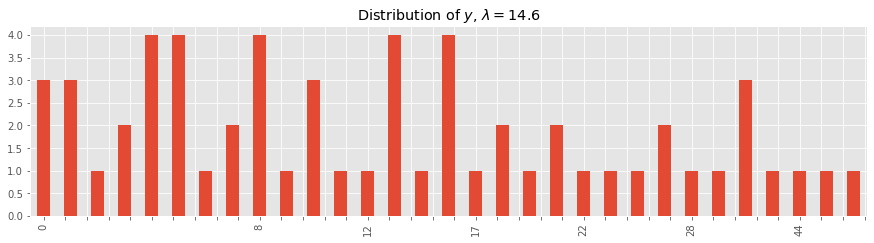

In [6]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

m = data['Y'].mean()
s = data['Y'].value_counts().sort_index()
ax = s.plot(kind='bar', figsize=(15, 3.5), title=rf'Distribution of $y$, $\lambda={m:.1f}$')
_ = ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [7]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [8]:
print(data['Y'].mean())
print(data['Y'].var())

14.610169491525424
147.96610169491524


In [9]:
X = data[['X1', 'X2', 'X3']]
Y = data['Y']
model_1 = sm.NegativeBinomial(Y,X).fit()
print(model_1.summary())

C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:861: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred) # not cdf
C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2642: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2733: RuntimeWarning: invalid value encountered in multiply
  dparams = exog*a1 * (y-mu)/(mu+a1)
C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2733: RuntimeWarning: invalid value encountered in true_divide
  dparams = exog*a1 * (y-mu)/(mu+a1)
C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2736: RuntimeWarning: invalid value encountered in true_divide
  - np.log(a1+mu) - (y-mu)/(a1+mu)).sum() * da1
C:\Users\S

         Current function value: 3.666553
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                0.008023
Time:                        10:36:19   Log-Likelihood:                -216.33
converged:                      False   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                    0.1739
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2174        nan        nan        nan         nan         nan

In [10]:
data = pd.read_excel("C:\\Users\\SSP\\Desktop\\Dr_Baradaran\\spf.data.4.401.V1.xlsx")
X = data[['X1', 'X2', 'X3']]
Y = data['Y']
model_2 = sm.NegativeBinomial(Y,X).fit(method='nm', maxiter=1000)
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 3.400313
         Iterations: 131
         Function evaluations: 230
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                 0.08005
Time:                        10:36:55   Log-Likelihood:                -200.62
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                 2.619e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2480      0.037      6.697      0.000       0.175    

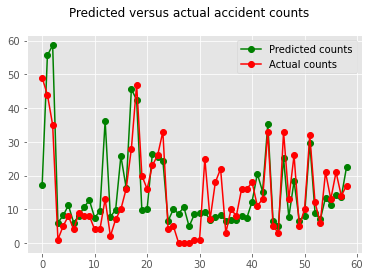

In [11]:
nb_predictions = model_2.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<AxesSubplot:xlabel='X1'>

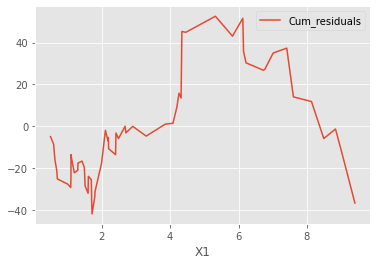

In [12]:
# CURE plot
data["fitted"] = model_2.predict()
data["residuals"] = data["Y"] - data["fitted"]
data.sort_values(by=['X1'], ascending=True, inplace=True)
data["Cum_residuals"] = data["residuals"].cumsum()
data.plot(x= 'X1', y= 'Cum_residuals')

In [44]:
#Final
data = pd.read_excel("C:\\Users\\SSP\\Desktop\\Dr_Baradaran\\spf.data.4.401.V1.xlsx")
X = data[['X1', 'X2', 'X3']]
Y = data['Y']
model_3 = sm.NegativeBinomial(Y,X).fit(method='newton', maxiter=1000)
print(model_3.summary())

Optimization terminated successfully.
         Current function value: 3.400313
         Iterations 5
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                 0.08005
Time:                        10:51:01   Log-Likelihood:                -200.62
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                 2.619e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2480      0.037      6.697      0.000       0.175       0.321
X2             0.0002   3.04e

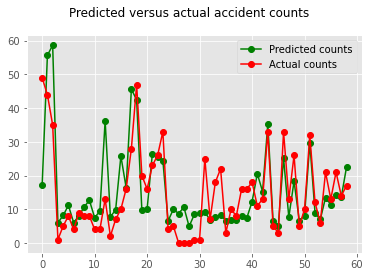

In [45]:
nb_predictions = model_3.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<AxesSubplot:xlabel='X1'>

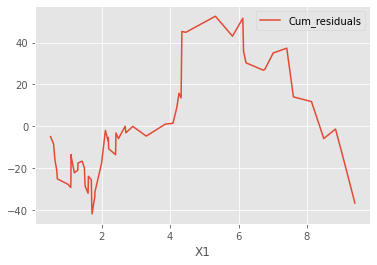

In [17]:
# CURE plot
data["fitted"] = model_3.predict()
data["residuals"] = data["Y"] - data["fitted"]
data.sort_values(by=['X1'], ascending=True, inplace=True)
data["Cum_residuals"] = data["residuals"].cumsum()
data.plot(x= 'X1', y= 'Cum_residuals')

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X2_scaled = scaler.fit_transform(X.drop(columns=["X1", "X3"]))
X_scaled = scaler.fit_transform(X)

In [40]:
X = pd.DataFrame(X_scaled, columns=['X1', 'X2', 'X3'])
X

,X1,X2,X3
0,0.380406,1.469345,0.075529
1,2.210625,1.469345,0.184484
2,2.357497,1.469345,-0.175733
3,-1.049991,1.469345,-1.237598
4,-0.733864,1.469345,-0.283098
5,-0.259515,1.469345,-0.184099
6,-1.046003,1.469345,-1.237598
7,-0.760299,1.469345,-0.237854
8,-0.343945,1.469345,-0.092783
9,-0.027312,1.469345,-0.373631


In [27]:
X["X2"] = X2_scaled
X.sort_index(inplace=True)
Y = data['Y']
model_4 = sm.NegativeBinomial(Y,X).fit()
print(model_4.summary())

Optimization terminated successfully.
         Current function value: 3.676985
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                0.005200
Time:                        10:43:15   Log-Likelihood:                -216.94
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                    0.3217
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.4508      0.040     1

C:\Users\SSP\AppData\Local\Temp/ipykernel_10120/3760385818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["X2"] = X2_scaled


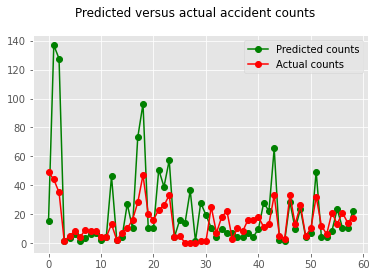

In [28]:
nb_predictions = model_4.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [42]:
#X["X2"] = X2_scaled
#X.sort_index(inplace=True)
Y = data['Y']
model_5 = sm.NegativeBinomial(Y,X).fit(method='nm', maxiter=1000)
print(model_5.summary())

Optimization terminated successfully.
         Current function value: 5.545294
         Iterations: 273
         Function evaluations: 462
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                 -0.5003
Time:                        10:50:26   Log-Likelihood:                -327.17
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.7112      0.153      4.655      0.000       0.412    

C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2642: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\discrete\discrete_model.py:2642: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)


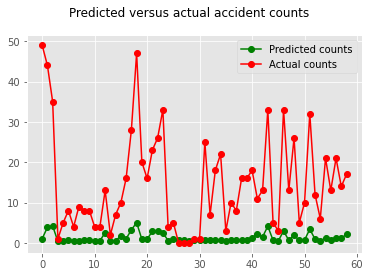

In [43]:
nb_predictions = model_5.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [31]:
X["X2"] = X2_scaled
X.sort_index(inplace=True)
Y = data['Y']
model_6 = sm.NegativeBinomial(Y,X).fit(method='bfgs', maxiter=1000)
print(model_6.summary())

Optimization terminated successfully.
         Current function value: 3.676985
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                0.005200
Time:                        10:44:23   Log-Likelihood:                -216.94
converged:                       True   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                    0.3217
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.4508      0.040     1

C:\Users\SSP\AppData\Local\Temp/ipykernel_10120/1291822170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["X2"] = X2_scaled


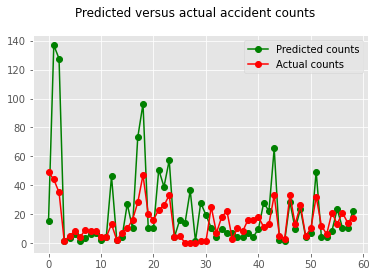

In [32]:
nb_predictions = model_6.predict(X)
actual_counts = Y
fig = plt.figure()
fig.suptitle('Predicted versus actual accident counts')
predicted, = plt.plot(X.index, nb_predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<AxesSubplot:xlabel='X1'>

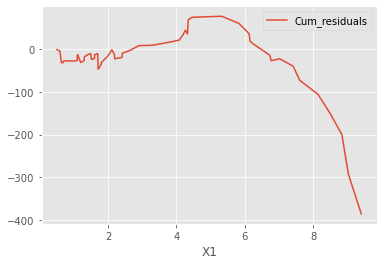

In [33]:
# CURE plot
data["fitted"] = model_6.predict()
data["residuals"] = data["Y"] - data["fitted"]
data.sort_values(by=['X1'], ascending=True, inplace=True)
data["Cum_residuals"] = data["residuals"].cumsum()
data.plot(x= 'X1', y= 'Cum_residuals')

In [41]:
#X = data[['X1', 'X2', 'X3']]
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
Y = data['Y']
model_7 = sm.NegativeBinomial(Y,X).fit(method='newton', maxiter=1000)
print(model_7.summary())

         Current function value: 16.757788
         Iterations: 1000
                     NegativeBinomial Regression Results                      
Dep. Variable:                      Y   No. Observations:                   59
Model:               NegativeBinomial   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                  -3.534
Time:                        10:49:37   Log-Likelihood:                -988.71
converged:                      False   LL-Null:                       -218.08
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.6627     90.668      0.007      0.994    -177.042     178.368
X2            -0.1444     83.540     -0.002      0.999    -163

C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
# CURE plot
data["fitted"] = model_7.predict()
data["residuals"] = data["Y"] - data["fitted"]

In [20]:
data.sort_values(by=['X1'], ascending=True, inplace=True)

In [21]:
data["Cum_residuals"] = data["residuals"].cumsum()

In [22]:
data.head()

,seg,Y,X1,X2,X3,fitted,residuals,Cum_residuals
28,31,0,0.505269,7307.333333,0.000000,4.910313,-4.910313,-4.910313
35,24,3,0.594510,7307.333333,1.682057,6.590997,-3.590997,-8.501310
29,30,1,0.633580,7307.333333,3.156663,8.449060,-7.449060,-15.950370
3,56,1,0.685524,8076.666667,0.000000,5.991754,-4.991754,-20.942125
6,53,4,0.695724,8076.666667,0.000000,6.006929,-2.006929,-22.949053


<AxesSubplot:xlabel='X1'>

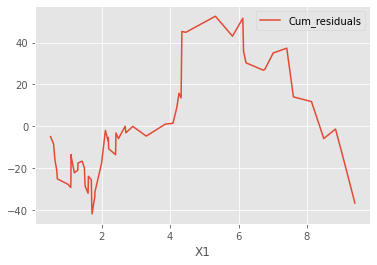

In [23]:
"""" Second, it is now easy to say what a good CURE plot should look like. It should
not have vertical drops because these are indicative of inordinately large
residuals—possible outliers. It should not have long increasing or decreasing runs
because these correspond to regions of consistent over and underestimation. It
should meander around the horizontal axis in a manner consistent with a “symmetric
random walk. """

data.plot(x= 'X1', y= 'Cum_residuals')

In [99]:
from sklearn.model_selection import KFold

X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values

preds, scores = [], []
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

for train_idx, test_idx in kfold.split(data):
    X_train, X_test = X[train_idx], X[test_idx]
    y_test = Y[test_idx]
    model = sm.GLM(data['Y'], data[['X1', 'X2', 'X3']], 
                     family=sm.families.NegativeBinomial()).fit()
    """"model = smf.glm(formula = "Y ~ w1 + w2 + w3 + C(w4)", 
                    data=, 
                    family=sm.families.NegativeBinomial()).fit()"""
    preds.append(model.get_prediction(X_test))
    scores.append(model.score(X_test, y_test))
print(scores)


AttributeError: 'GLMResults' object has no attribute 'score'

In [100]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   59
Model:                            GLM   Df Residuals:                       56
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -209.29
Date:                Sun, 19 Jun 2022   Deviance:                       32.925
Time:                        12:32:31   Pearson chi2:                     24.5
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2853
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2531      0.055      4.632      0.0

In [102]:
model.params

X1    0.253070
X2    0.000203
X3    0.190708
dtype: float64

In [43]:
from statsmodels.graphics.api import abline_plot

In [54]:
nobs = my_model.nobs
y = data['Y']
yhat = my_model.mu

In [55]:
for i in range(0,59):
    print(y[i] - yhat[i])

30.485206251250727
-12.45030685540219
-22.001248046103832
-5.153690013048789
-2.5510547968358708
-3.0141451786479596
-2.1695955777476845
1.5770605030725546
-2.492208938613542
-4.639392715514127
-3.760031751983533
-5.853936358372263
-22.441094740336432
-5.992827632608344
-2.511700375765745
-15.28351546723449
0.008713773178843809
-19.469558064724076
5.627970779471468
11.174357047991691
5.940124535591389
-3.4141247351926474
0.757738867473492
11.495254005408384
-2.8996988416899923
-4.994266631600157
-8.349501052248891
-9.527886437005849
-5.0272787419267155
-8.481572811461222
-6.026964417613544
15.960540791635925
0.849639174091533
11.048065088269606
13.125496949393114
-2.14210786131114
2.874137721744315
-0.24327709758006222
9.348904071575184
9.01966766072723
5.651079243831536
-9.62202600603598
-2.7542490042886296
-5.04719366725908
-1.7967824726763082
-2.2864665145362304
6.901995746718612
4.735266422825282
6.3594009595114755
-1.9471807714896778
1.3742289180030127
0.8332548636942683
2.7649609

In [56]:
my_model.fittedvalues

0     18.514794
1     56.450307
2     57.001248
3      6.153690
4      7.551055
5     11.014145
6      6.169596
7      7.422939
8     10.492209
9     12.639393
10     7.760032
11     9.853936
12    35.441095
13     7.992828
14     9.511700
15    25.283515
16    15.991286
17    47.469558
18    41.372029
19     8.825643
20    10.059875
21    26.414125
22    25.242261
23    21.504746
24     6.899699
25     9.994267
26     8.349501
27     9.527886
28     5.027279
29     9.481573
30     7.026964
31     9.039459
32     6.150361
33     6.951935
34     8.874503
35     5.142108
36     7.125862
37     8.243277
38     6.651096
39     6.980332
40    12.348921
41    20.622026
42    15.754249
43    38.047194
44     6.796782
45     5.286467
46    26.098004
47     8.264734
48    19.640599
49     6.947181
50     8.625771
51    31.166745
52     9.235039
53     6.186197
54    14.136124
55    12.570159
56    15.015326
57    14.413876
58    22.540385
dtype: float64